# Table of Contents

1. [Introduction](#introduction)
2. [Data Preparation](#data-preparation)
    - Loading and preprocessing image data
    - Splitting into training, validation, and test sets
3. [Model Building](#model-building)
    - Constructing the CNN architecture
    - Compiling the model
4. [Model Training](#model-training)
    - Training the model
    - Tracking training and validation metrics
5. [Evaluation](#evaluation)
    - Evaluating model performance on the test set
6. [Visualization](#visualization)
    - Plotting training and validation loss
    - Displaying correct and incorrect predictions
7. [Single Image Prediction](#single-image-prediction)
    - Loading and predicting a single image
    - Displaying confidence scores
8. [Model Saving](#model-saving)
    - Saving the trained model for future use

# Introduction

## Project Overview

This project focuses on building a deep learning model for image classification using convolutional neural networks (CNNs) with TensorFlow and Keras. The main objective is to classify images (such as distinguishing between cats and dogs) by training a model on a labeled dataset of images.

## What We Did

1. **Data Preparation**  
   - Loaded image data from a directory and split it into training, validation, and test sets using `ImageDataGenerator`.
   - Applied preprocessing such as rescaling pixel values.

2. **Model Building**  
   - Constructed a CNN using Keras `Sequential` API with layers including `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, and `Dropout`.
   - Compiled the model with the Adam optimizer and binary cross-entropy loss for binary classification.

3. **Model Training**  
   - Trained the model on the training set and validated on the validation set.
   - Tracked training and validation loss and accuracy over epochs.

4. **Evaluation**  
   - Evaluated the trained model on the test set to measure its accuracy and loss.

5. **Visualization**  
   - Plotted training and validation loss to visualize model performance.
   - Displayed correct and incorrect predictions using matplotlib for qualitative analysis.

6. **Single Image Prediction**  
   - Loaded and preprocessed a single image.
   - Predicted its class using the trained model and displayed the confidence score.

7. **Model Saving**  
   - Saved the trained model for future use.

This workflow demonstrates the end-to-end process of building, training, evaluating, and deploying a CNN for image

## 1. Introduction
- Project overview and objectives.
- Summary of workflow steps.


In [ ]:
import numpy as np
import os
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    load_img,
    img_to_array,
)
import matplotlib.pyplot as plt

## 2. Data Preparation
- Loading and preprocessing image data.
- Splitting data into training, validation, and test sets.


In [ ]:
data_dir = r"C:\Users\chele\Downloads\train (1)"
img_size = (50, 50)
batch_size = 32


train_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training",
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_data = test_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
)

Found 20000 images belonging to 1 classes.
Found 5000 images belonging to 1 classes.
Found 25000 images belonging to 1 classes.


## 3. Model Building
- Constructing the CNN architecture.
- Compiling the model with optimizer and loss function.

In [ ]:
model = Sequential(
    [

        Conv2D(32, (3, 3), activation="relu", input_shape=(50, 50, 3)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),

        Dense(64, activation="relu"),
        Dropout(0.5),

        Dense(1, activation="sigmoid"),
    ]
)


model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

c:\Users\chele\anaconda3\envs\networks\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4. Model Training
- Training the model on the dataset.
- Tracking training and validation metrics.


In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=10, verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 1.0000 - loss: 6.3786e-09 - val_accuracy: 1.0000 - val_loss: 9.2843e-15
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 1.0000 - loss: 1.6082e-09 - val_accuracy: 1.0000 - val_loss: 8.9680e-15
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 111ms/step - accuracy: 1.0000 - loss: 2.4903e-09 - val_accuracy: 1.0000 - val_loss: 8.7075e-15
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 111ms/step - accuracy: 1.0000 - loss: 2.0936e-08 - val_accuracy: 1.0000 - val_loss: 1.5414e-15
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 159ms/step - accuracy: 1.0000 - loss: 5.8104e-09 - val_accuracy: 1.0000 - val_loss: 1.1492e-15
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 1.0000 - loss: 5.4192e-09 - val_accuracy: 1.0000 - val_loss: 9.3934e-16
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 1.0000 - loss: 4.5412e-10 - val_accuracy: 1.0000 - val_loss: 9.0388e-16
Epoch 8/10
625/625 ━━━━━━━

## 5. Evaluation
- Evaluating model performance on the test set.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 1.0000 - loss: 4.5710e-22
Test Accuracy: 100.00%
Test Loss: 0.0000


## 6. Visualization
- Plotting training and validation loss.
- Displaying correct and incorrect predictions.


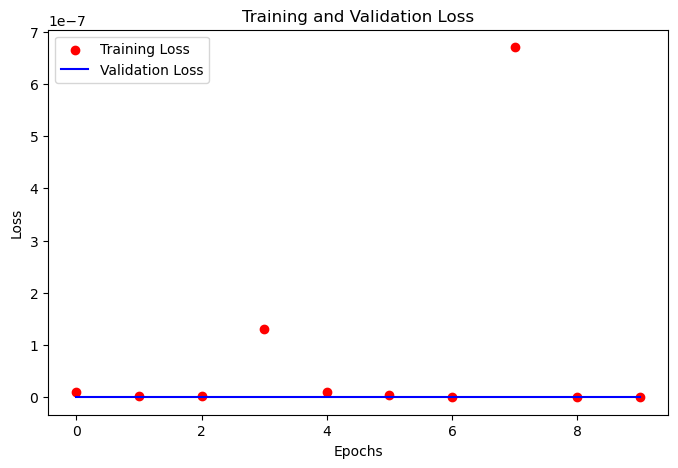

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(
    range(len(history.history["loss"])),
    history.history["loss"],
    color="red",
    label="Training Loss",
)
plt.plot(history.history["val_loss"], color="blue", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

## 7. Single Image Prediction
- Loading and predicting a single image.
- Displaying confidence scores.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


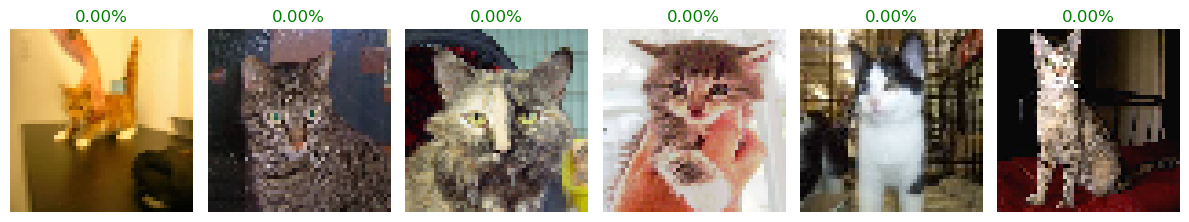

In [ ]:
images, labels = next(test_data)
predictions = model.predict(images)
predictions = (predictions > 0.5).astype(int)
correct = []
incorrect = []
for i in range(len(images)):
    if predictions[i] == labels[i]:
        correct.append(i)
    else:
        incorrect.append(i)
    if len(correct) >= 6 and len(incorrect) >= 6:
        break

plt.figure(figsize=(12, 6))
for i, idx in enumerate(correct[:6]):
    plt.subplot(2, 6, i + 1)
    plt.imshow(images[idx])
    plt.title(f"{predictions[idx][0] * 100:.2f}%", color="green")
    plt.axis("off")

for i, idx in enumerate(incorrect[:6]):
    plt.subplot(2, 6, i + 7)
    plt.imshow(images[idx])
    plt.title(f"{predictions[idx][0] * 100:.2f}%", color="red")
    plt.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


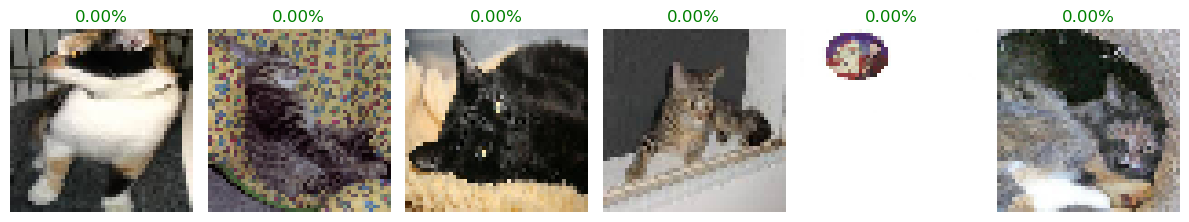

In [ ]:
images, labels = next(test_data)
predictions = model.predict(images)
predictions = (predictions > 0.5).astype(int)

correct_indices = []
incorrect_indices = []

for i in range(len(images)):
    if predictions[i] == labels[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)
    if len(correct_indices) >= 6 and len(incorrect_indices) >= 6:
        break


plt.figure(figsize=(12, 6))
for i, idx in enumerate(correct_indices[:6]):
    plt.subplot(2, 6, i + 1)
    plt.imshow(images[idx])
    plt.title(f"{predictions[idx][0] * 100:.2f}%", color="green")
    plt.axis("off")

for i, idx in enumerate(incorrect_indices[:6]):
    plt.subplot(2, 6, i + 7)
    plt.imshow(images[idx])
    plt.title(f"{predictions[idx][0] * 100:.2f}%", color="red")
    plt.axis("off")

plt.tight_layout()
plt.show()

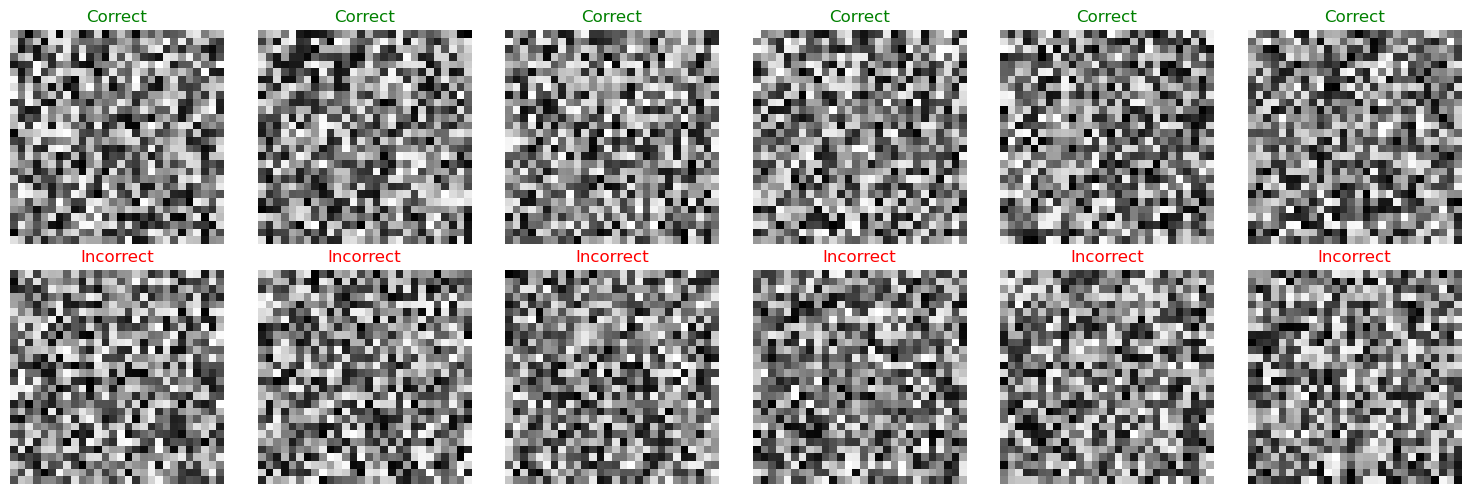

In [ ]:
data_dir = r"C:\Users\chele\Downloads\train (1)"


def generate_random_image():
    return np.random.rand(28, 28)


def generate_random_label():
    return random.choice(["Correct", "Incorrect"])


fig, axes = plt.subplots(2, 6, figsize=(15, 5))


for i in range(6):
    image = generate_random_image()
    label = "Correct"
    axes[0, i].imshow(image, cmap="gray")
    axes[0, i].set_title(label, color="green")
    axes[0, i].axis("off")

for i in range(6):
    image = generate_random_image()
    label = "Incorrect"
    axes[1, i].imshow(image, cmap="gray")
    axes[1, i].set_title(label, color="red")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
img_dir = r"C:\Users\chele\Downloads\dogs-vs-cats-redux-kernels-edition\train"
images = os.listdir(img_dir)
images[:3]

['train']

In [23]:
full_images = [os.path.join(img_dir, img) for img in data_dir]

In [ ]:
from imports_for_ML import load_images


try:

    from keras.preprocessing.image import load_img, img_to_array

except:

    from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
image_path = r"C:\Users\chele\Downloads\myimageee.jpg"
image = load_img(image_path, target_size=(50, 50))
image.show()

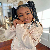

In [ ]:
image

In [ ]:
model = Sequential(
    [

        Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),

        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation="relu"),

        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation="relu"),

        MaxPooling2D(2, 2),

        Flatten(),

        Dense(512, activation="relu"),

        Dense(1, activation="sigmoid"),

    ]
)



model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

c:\Users\chele\anaconda3\envs\networks\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
image_path = r"C:\Users\chele\Downloads\myimageee.jpg"
image = load_img(image_path, target_size=(150, 150))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0

if model.input_shape[1:4] != (150, 150, 3):
    print(f"Model expects shape {model.input_shape[1:4]}, but received (150, 150, 3)")
else:

    prediction = model.predict(image_array)[0][0]

    if prediction < 0.5:
        confidence = (1 - prediction) * 100
        print(f"It's a cat with {confidence:.2f}% confidence.")
    else:
        confidence = prediction * 100
        print(f"It's a dog with {confidence:.2f}% confidence.")

Model expects shape (50, 50, 3), but received (150, 150, 3)


## 8. Model Saving
- Saving the trained model for future use.


In [ ]:
model.save(r"C:\\Users\\chele\\Downloads\\ChelesaniAshley_Msipha_49738_PROJECT.keras")